In [1]:
from karabo.imaging.image import Image

# Render plots inline
%matplotlib inline

The RASCIL data directory is not available - continuing but any simulations will fail


## Read in the image

In [2]:
# Load example fits
from karabo.data.external_data import (
    SingleFileDownloadObject,
    cscs_karabo_public_base_url,
)

example_fits = SingleFileDownloadObject(
    remote_file_path="restored_filtered_example_gleam.fits",
    remote_base_url=cscs_karabo_public_base_url,
)

In [3]:
restored = Image.read_from_file(example_fits.get())

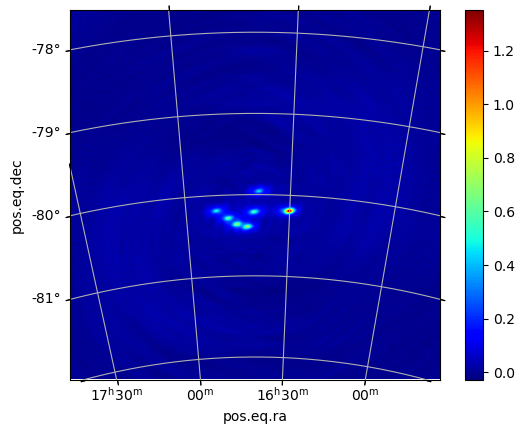

In [4]:
restored.plot()

## Cut the image into pieces

In [5]:
# Cut image into 4, with an overlap of 100 pixels
restored_cuts = restored.split_image(N=2, overlap=100)

In [6]:
len(restored_cuts)

4

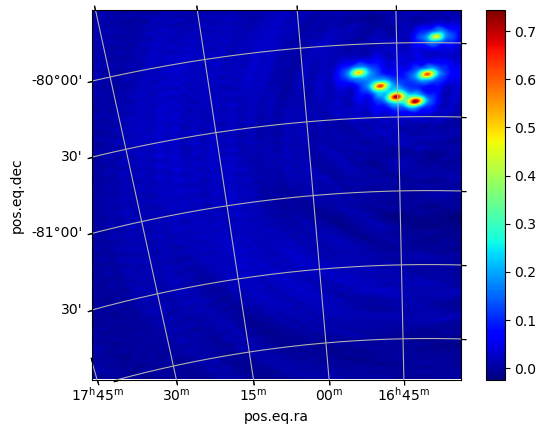

In [7]:
restored_cuts[0].plot()

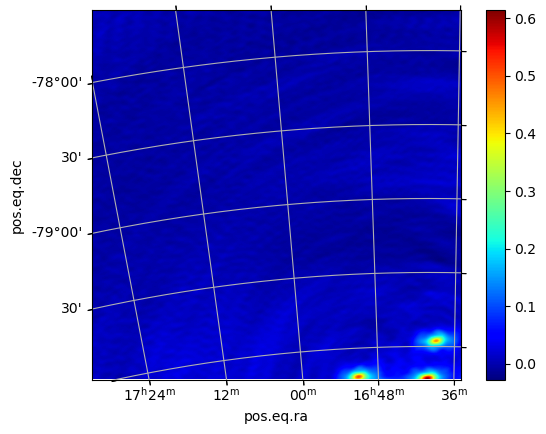

In [8]:
restored_cuts[1].plot()

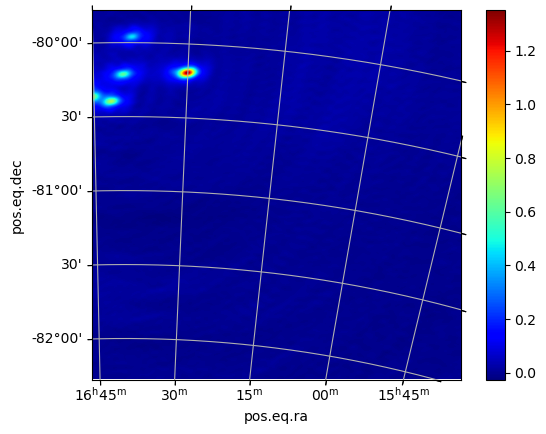

In [9]:
restored_cuts[2].plot()

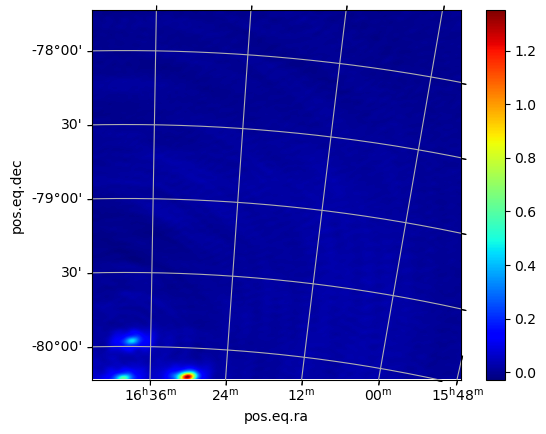

In [10]:
restored_cuts[3].plot()

## Mosaicking
Mosaicking in Karabo works with the astropy reproject: https://reproject.readthedocs.io/en/stable/

In [11]:
from karabo.imaging.image import ImageMosaicker

In [12]:
mi = ImageMosaicker()
restored_mosaicked = mi.mosaic(restored_cuts)

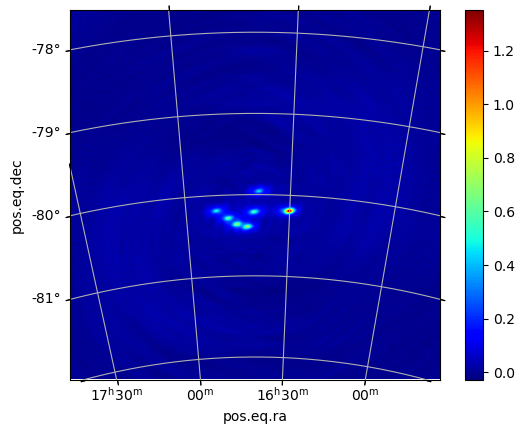

In [13]:
# Show restored image
restored_mosaicked[0].plot()

In [14]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

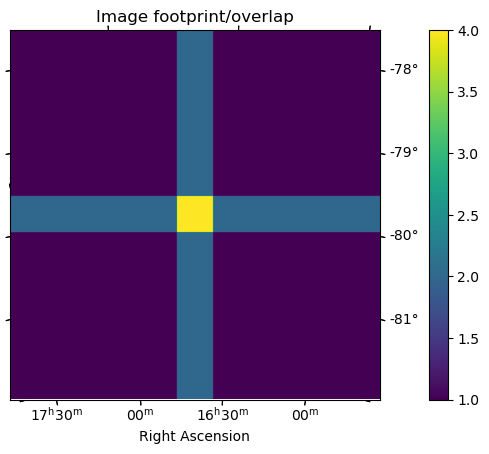

In [15]:
# Create a figure and axis with WCS projection
fig = plt.figure()  # Adjust the figure size as needed
ax2 = fig.add_subplot(111, projection=WCS(restored_mosaicked[0].header))
im = ax2.imshow(restored_mosaicked[1], origin="lower")

# Set labels and title
ax2.coords["ra"].set_axislabel("Right Ascension")
ax2.coords["dec"].set_axislabel("Declination")
ax2.coords["dec"].set_axislabel_position("r")
ax2.coords["dec"].set_ticklabel_position("r")
ax2.set_title("Image footprint/overlap")

# Add the color bar and move it to the right
plt.colorbar(im, ax=ax2, pad=0.1)

plt.show()

### Negative overlap

In [16]:
# Cut image into 4, with an overlap of 100 pixels
restored_cuts = restored.split_image(N=2, overlap=-100)

In [17]:
mi = ImageMosaicker()
restored_mosaicked = mi.mosaic(restored_cuts)

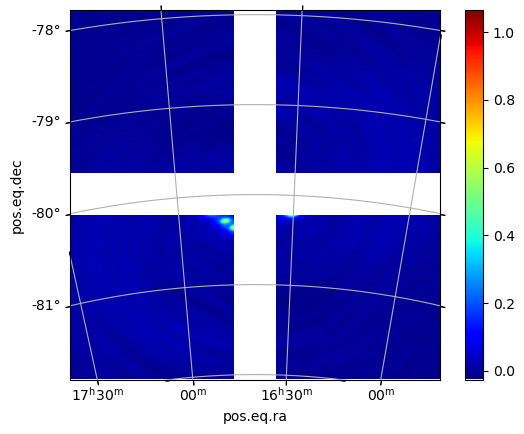

In [18]:
# Show restored image
restored_mosaicked[0].plot()

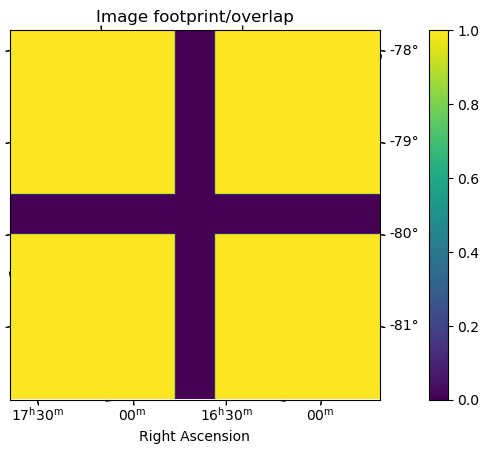

In [19]:
# Create a figure and axis with WCS projection
fig = plt.figure()  # Adjust the figure size as needed
ax2 = fig.add_subplot(111, projection=WCS(restored_mosaicked[0].header))
im = ax2.imshow(restored_mosaicked[1], origin="lower")

# Set labels and title
ax2.coords["ra"].set_axislabel("Right Ascension")
ax2.coords["dec"].set_axislabel("Declination")
ax2.coords["dec"].set_axislabel_position("r")
ax2.coords["dec"].set_ticklabel_position("r")
ax2.set_title("Image footprint/overlap")

# Add the color bar and move it to the right
plt.colorbar(im, ax=ax2, pad=0.1)

plt.show()